# Big Data from social media

If you have enough eyes, any problem becomes obvious. The challenge is getting information in from
large numbers of users efficiently.

This notebook analyses the sentiment expressed in a few social media posts about the playground.

In [1]:
%matplotlib inline
import matplotlib
import nltk
import pandas
import datetime

def sentiment(x):
    return sum([z for (w,z) in sentiment_by_word(x)])
    
def sentiment_by_word(x):
    answer = []
    for (word, pos) in nltk.pos_tag(nltk.word_tokenize(x)):
        for s in nltk.corpus.sentiwordnet.senti_synsets(word):
            (name, s_pos, number) = s.synset.name().split('.')
            if ((pos[0] == 'J' and s_pos == 's') or 
                (pos[0] == 'V' and s_pos == 'v') or 
                (pos[0] == 'N' and s_pos == 'n') or
                (pos[0] == 'R' and s_pos == 'r')):
                answer.append((word, s.pos_score() - s.neg_score()))
                break
    return answer

In [2]:
sentiment_by_word("The park looks dreadful, and the swing set is dangerous")

[('park', 0.0),
 ('looks', 0.0),
 ('dreadful', -0.625),
 ('swing', 0.0),
 ('set', 0.125),
 ('is', 0.125),
 ('dangerous', -0.625)]

In [3]:
sentiment_by_word("The park is looking gorgeous now and the swings are so much fun")

[('park', 0.0),
 ('is', 0.125),
 ('looking', 0.0),
 ('gorgeous', 0.75),
 ('now', 0.0),
 ('swings', 0.0),
 ('are', 0.125),
 ('so', 0.0),
 ('fun', 0.375)]

In [4]:
sm = pandas.read_csv('social-media.csv', parse_dates=['Date'])
sm

,Date,Message
0,2013-06-06,The Shire Council was appalled to receive phot...
1,2013-09-01,Over many years the playground at the Train Pa...
2,2013-10-03,This video is not from Council but we need to ...
3,2013-11-02,The playground was established in 1954 and is ...
4,2013-12-01,I'm very upset about the playground being move...


In [5]:
playgrounds = sm[sm.Message.str.contains('playground')].copy()

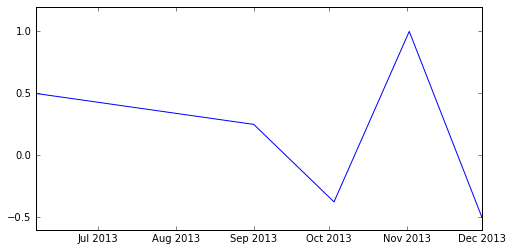

In [6]:
playgrounds['sentiment'] = playgrounds.Message.map(sentiment)
fig = matplotlib.pyplot.plot(playgrounds.Date, playgrounds.sentiment)
fig[0].figure.set_figwidth(8)

In [7]:
playground_text = nltk.Text(sum(playgrounds.Message.map(nltk.word_tokenize),[]))
playground_text

<Text: The Shire Council was appalled to receive photographic...>

In [8]:
playground_text.concordance('playground')

Displaying 6 of 6 matches:
                                  playground . Over many years the playground 
 playground . Over many years the playground at the Train Park has used by gen
o is responsible for this sort of playground in our area ? The playground was 
t of playground in our area ? The playground was established in 1954 and is mu
today . I 'm very upset about the playground being moved . A recent meeting wi
Track Alliance confirmed that the playground will be renovated and revamped .


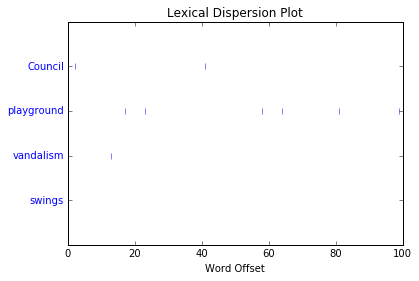

In [10]:
playground_text.dispersion_plot(['Council', 'playground', 'vandalism', 'swings'])